<h1>군집분석( Clustering Analysis )</h1>
<br>
<div>
  <ul>
   <p>유사한 정도에 따라 데이터를 군집으로 나누는 분석 </p>
   <p>계층형 클러스터링 / 비계층형 클러스터링이 존재</p>
   <p>유클리드 거리 기반으로 유사한 데이터를 클러스터로 구분 </p>
   <p>분석에 대한 가설 검정이 없음</p>
  </ul>
</div>

<h3>계층적 군집분석 ( hierarchical ) </h3>
<br>
<div>
    <ul>
        <p>유클리드 거리를 이용한 군집 분석 방법</p>
        <p>계층적으로 군집 결과 도출</p>
        <p>탐색적 군집분석</p>
        <p>결과로 덴드로그램 도출</p>
    </ul>
</div>

<span style="font-size:20px"> 방식 </span>
```
1. 단일결합방식 : 각 군집에서 중심으로부터 거리가 가까운 것 1개씩 비교하여 가까운 것 끼리 군집화
2. 완전결합방식 : 각 군집에서 중심으로부터 거리가 먼 대상끼리 비교하여 가장 가까운 것끼리 군집화
3. 평균결합빙식 : 한 군집 안에 속해 있는 모든 대상과 다른 군집에 속해있는 모든 대상의 거리를 평균 계산하여 가장 가까운 것 끼리 군집화
```

In [60]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

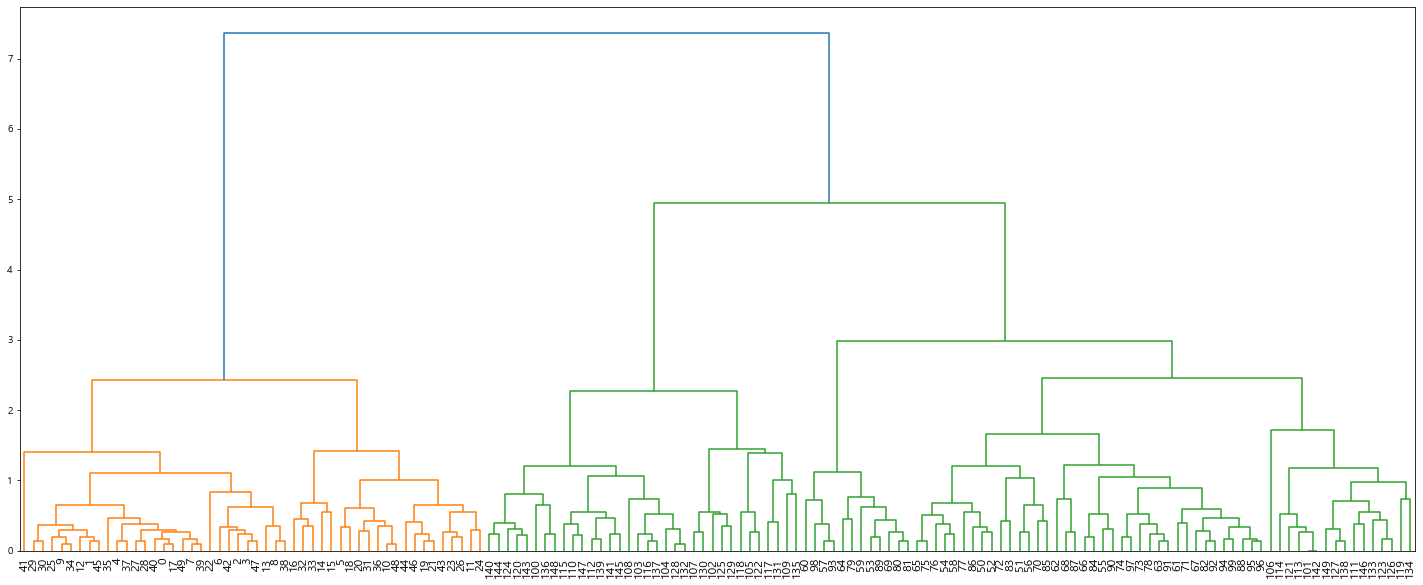

In [61]:
# hierarchy 분석
from sklearn.datasets import load_iris

from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster 
iris = load_iris()

features = [x.replace("(", "").replace(")", "").replace("cm","") for x in iris.feature_names]

x = iris.data
data = pd.DataFrame(x, columns = features)
data['Species'] = iris.target

"""
method : single ( 단순연결 )
         complete ( 완전연결 )
         average ( 평균 연결 )
"""
clusters = linkage(y=data, method='complete', metric='euclidean')

# leaf_rotation - 글자 각도
plt.figure( figsize = (25, 10) )
dendrogram(clusters, leaf_rotation=90, leaf_font_size=12,)
plt.show() 

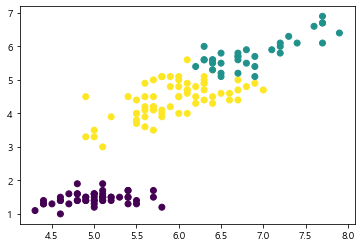

In [62]:
# 군집 결과 
cut_tree = fcluster(clusters, t=3, criterion='distance')
labels = data['Species']

df = pd.DataFrame({'pred':cut_tree, 'labels':labels})
con_mat = pd.crosstab(df['pred'], df['labels'])
# 군집 결과를 추가 
data['cluster'] = cut_tree

plt.scatter(x=data['sepal length '], y=data['petal length '], c=data['cluster'])
plt.show()

<h3>비계층적 군집분석 ( k-Means ) </h3>
<br>
<div>
    <ul>
        <p>계층적 군집분석보다 속도 빠름</p>
        <p>군집 수를 미리 알고 있는 경우 이용</p>
        <p>확인적 군집분석</p>
        <p>k는 미리 정해야 하는 값</p>
        <p>계층적 군집화 결과에 의거하여 군집 수 결정</p>
    </ul>
</div>

<span style="font-size:20px"> 과정 </span>
```
1. k값 설정한 후, k개의 중심 설정
2. 데이터를 가까운 군집 중심에 할당
3. 군집에 할당된 데이터의 중심 위치 계산( 중심 재설정 )
4. 조정된 중심에 데이터 할당
5. 3번~4번 반복 ( 중심 조정이 되지 않을때까지 )
```

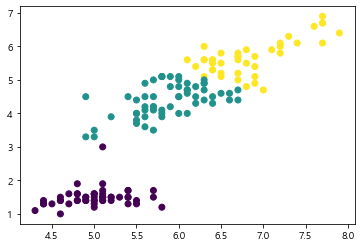

In [63]:
# k-means
from sklearn.cluster import KMeans
iris = load_iris()
features = [x.replace("(", "").replace(")", "").replace("cm","") for x in iris.feature_names]

x = iris.data
data = pd.DataFrame(x, columns = features)
data['Species'] = iris.target

# 두 개의 features만 사용
iris = data[['sepal length ', 'petal length ']]

# n_clusters : 군집 개수 
model = KMeans(n_clusters=3, random_state=0, algorithm='auto')
model.fit(iris)

pred = model.predict(iris)
plt.scatter(x=iris['sepal length '], y=iris['petal length '], c=pred)
plt.show()